### 循环神经网络

In [1]:
import torch
from torch import nn, optim

#### rnn_cell 只能同时处理一个序列，同时返回隐藏向量

In [2]:
rnn_cell = nn.RNNCell(input_size=5, hidden_size=7)
rnn_cell

RNNCell(5, 7)

In [ ]:
rnn_cell.weight_ih

In [4]:
x = torch.randn(1, 5)
h = torch.randn(1, 7)
rnn_cell(x,h)

tensor([[ 0.6759,  0.1831,  0.8705,  0.4183,  0.1642,  0.3388, -0.8130]],
       grad_fn=<TanhBackward>)

#### rnn 同时处理一串序列，同时返回输出向量序列和隐藏向量

In [5]:
rnn = nn.RNN(input_size=5, hidden_size=7)

In [6]:
# (3,2,5):序列长度为３，批量数为２，特征维度数为５
inputs = torch.randn(3,2,5)
# (1,2,7):序列长度为１，批量数为２，特征维度数为７
hidden = torch.randn(1,2,7)
inputs,hidden

(tensor([[[-0.7272,  0.8607, -0.4280, -0.0284, -1.4232],
          [-1.6927, -0.7892,  1.6282,  0.2366, -0.6399]],
 
         [[-0.2688,  1.0347,  0.6355, -0.4815, -1.0464],
          [ 0.0677,  0.3038,  0.8281,  1.3789,  0.2875]],
 
         [[ 0.2300,  0.7441,  0.0678, -1.5325, -0.2350],
          [-1.1234,  0.3521, -0.1496, -0.3866,  0.4220]]]),
 tensor([[[ 0.1579,  0.3035, -1.0400, -0.2304, -0.6011, -1.0297,  0.4250],
          [-1.2358,  0.9808, -2.1520, -0.0990,  0.7809,  1.4918, -0.3274]]]))

In [7]:
rnn(inputs, hidden)

(tensor([[[ 0.4891,  0.0672,  0.7872,  0.5195, -0.8518,  0.4025, -0.7628],
          [ 0.9088, -0.5636,  0.8260,  0.8609, -0.2562,  0.9014,  0.1249]],
 
         [[-0.0180,  0.1780, -0.1037, -0.0279, -0.4306,  0.7372, -0.0820],
          [-0.5667,  0.6821, -0.3098, -0.3132, -0.5516,  0.7974,  0.8349]],
 
         [[-0.1088,  0.2592, -0.0841,  0.7729,  0.0506, -0.1416, -0.3277],
          [-0.1490,  0.1210,  0.2094,  0.7887, -0.2340,  0.3428, -0.0349]]],
        grad_fn=<StackBackward>),
 tensor([[[-0.1088,  0.2592, -0.0841,  0.7729,  0.0506, -0.1416, -0.3277],
          [-0.1490,  0.1210,  0.2094,  0.7887, -0.2340,  0.3428, -0.0349]]],
        grad_fn=<StackBackward>))

#### LSTMCell(弥补传统RNN 处理长序列时出现"梯度消失"的问题) 输入3个： x0, h0, c0; 输出: (h1, c1)

In [9]:
lstm_cell = nn.LSTMCell(input_size=5, hidden_size=7)
lstm_cell

LSTMCell(5, 7)

In [10]:
inputs = torch.randn(1,5)
h0 = torch.randn(1,7)
c0 = torch.randn(1,7)

In [11]:
lstm_cell(inputs, (h0, c0))

(tensor([[ 0.0837, -0.1347,  0.0194,  0.2330,  0.0613, -0.2691, -0.4994]],
        grad_fn=<MulBackward0>),
 tensor([[ 0.1411, -0.3423,  0.0870,  0.3151,  0.0901, -0.3968, -0.6252]],
        grad_fn=<AddBackward0>))

#### LSTM 可直接将序列当成输入 输入3个： x0, h0, c0; 输出: (x1, h1, c1)

In [89]:
inputs = torch.randn(1,20,2)
h0 = torch.randn(1,1,20)
c0 = torch.randn(1,1,20)
lstm = nn.LSTM(input_size=2, hidden_size=20, batch_first=True)
out = nn.Linear(20, 2)

In [90]:
output, (h1, c1) = lstm(inputs, (h0, c0)) 

In [91]:
output

tensor([[[ 7.6296e-03, -5.1131e-02, -3.6544e-01,  2.5113e-02, -4.7643e-03,
           1.9745e-01,  1.5136e-01, -2.0063e-01, -2.0736e-01,  1.4044e-01,
           1.1696e-02,  3.1559e-01,  8.7579e-02, -2.6643e-01, -1.9785e-02,
           3.1298e-01, -2.0800e-01, -2.5710e-01, -7.5997e-02, -1.9641e-01],
         [-3.6111e-02, -1.2134e-01, -5.1137e-02,  5.8394e-04,  2.4564e-02,
           8.6415e-02,  1.8202e-01, -4.8887e-02, -1.5022e-01,  2.7103e-01,
           1.7534e-02,  1.2173e-01,  6.2186e-02, -1.5057e-01, -7.5987e-02,
           1.0439e-01, -2.3057e-02, -2.6026e-01, -2.7057e-02,  6.3116e-04],
         [ 1.7897e-02, -1.2292e-01,  4.0883e-02,  5.6961e-02,  9.4980e-02,
           5.0601e-02,  4.8393e-02,  9.9059e-02, -8.8850e-02,  9.1384e-02,
          -2.6756e-02,  7.5491e-02, -1.8064e-02, -4.2638e-02, -3.4674e-02,
           1.2703e-01,  9.2127e-02, -1.4313e-01,  1.0723e-01,  7.0383e-02],
         [ 1.0618e-03, -1.1216e-01,  6.3537e-02,  6.2508e-02,  1.2938e-01,
           3.5971e-02,

In [92]:
out(output)

tensor([[[ 0.0798, -0.1264],
         [ 0.0970, -0.2213],
         [ 0.0863, -0.1841],
         [ 0.0861, -0.1729],
         [ 0.0740, -0.2352],
         [ 0.0928, -0.2172],
         [ 0.0958, -0.2188],
         [ 0.1023, -0.1682],
         [ 0.1089, -0.0312],
         [ 0.0634, -0.1805],
         [ 0.0814, -0.2026],
         [ 0.1001, -0.1605],
         [ 0.1060, -0.1486],
         [ 0.1029, -0.1509],
         [ 0.1063, -0.1669],
         [ 0.1108, -0.0792],
         [ 0.0811, -0.1807],
         [ 0.0975, -0.1726],
         [ 0.1092, -0.1281],
         [ 0.1073, -0.1514]]], grad_fn=<AddBackward0>)

In [93]:
out(output[0,:]).unsqueeze(0)

tensor([[[ 0.0798, -0.1264],
         [ 0.0970, -0.2213],
         [ 0.0863, -0.1841],
         [ 0.0861, -0.1729],
         [ 0.0740, -0.2352],
         [ 0.0928, -0.2172],
         [ 0.0958, -0.2188],
         [ 0.1023, -0.1682],
         [ 0.1089, -0.0312],
         [ 0.0634, -0.1805],
         [ 0.0814, -0.2026],
         [ 0.1001, -0.1605],
         [ 0.1060, -0.1486],
         [ 0.1029, -0.1509],
         [ 0.1063, -0.1669],
         [ 0.1108, -0.0792],
         [ 0.0811, -0.1807],
         [ 0.0975, -0.1726],
         [ 0.1092, -0.1281],
         [ 0.1073, -0.1514]]], grad_fn=<UnsqueezeBackward0>)

In [14]:
output.size(), h1.size(), c1.size()

(torch.Size([3, 2, 7]), torch.Size([1, 2, 7]), torch.Size([1, 2, 7]))

#### LSTM 实例

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
steps = np.linspace(0, np.pi*2, 100, dtype=np.float32)

In [17]:
input_x = np.sin(steps)
target_y = np.cos(steps)

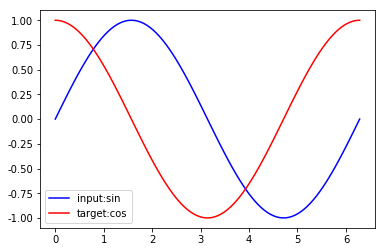

In [18]:
plt.plot(steps, input_x, 'b-', label='input:sin')
plt.plot(steps, target_y, 'r-', label='target:cos')
plt.legend(loc='best')
plt.show()

In [21]:
class LSTM(nn.Module):
    def __init__(self, input_size):
        super(LSTM, self).__init__()
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=20,
            batch_first=True,
        )
        self.out = nn.Linear(20, 1)
    
    def forward(self, x, h_state, c_state):
        r_out, (h_state, c_state) = self.lstm(x, (h_state, c_state))
        outputs = self.out(r_out[0, :]).unsqueeze(0)
        return outputs, h_state, c_state
    
    def init_hidden(self):
        h_state = torch.randn(1, 1, 20)
        c_state = torch.randn(1, 1, 20)
        return h_state, c_state

In [95]:
lstm = LSTM(input_size=1)
optimizer = optim.Adam(lstm.parameters(), lr=0.001)
loss_func = nn.MSELoss()
h_state, c_state = lstm.init_hidden()

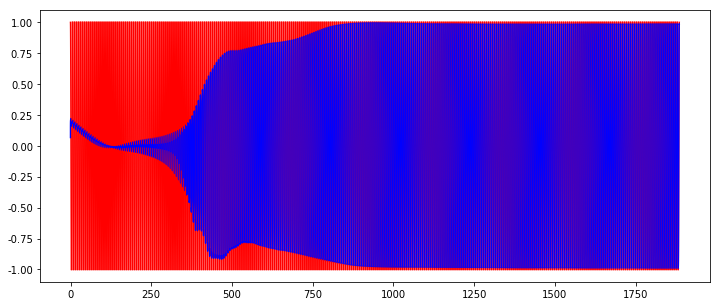

In [96]:
plt.figure(1, figsize=(12,5))
plt.ion()

for step in range(600):
    start, end = step * np.pi, (step+1)*np.pi
    steps = np.linspace(start, end, 100, dtype=np.float32)
    x_np = np.sin(steps)
    y_np = np.cos(steps)
    x = torch.from_numpy(x_np).unsqueeze(0).unsqueeze(-1)
    y = torch.from_numpy(y_np).unsqueeze(0).unsqueeze(-1)
    prediction, h_state, c_state = lstm(x, h_state, c_state)
    h_state = h_state.data
    c_state = c_state.data
    loss = loss_func(prediction, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    plt.plot(steps, y_np.flatten(), 'r-')
    plt.plot(steps, prediction.data.numpy().flatten(), 'b-')
    plt.draw();
    
plt.ioff()
plt.show()